In [1]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('./data/cleaned_kc_house_data.csv')

In [3]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,4.0,1.0,2.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,4.0,0.0,2.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,1.0,98028,47.7379,-122.233,2720,8062,0,3.0,0.0,2.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910,4.0,0.0,4.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0,5.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,0,5.0,0.0,2.0
21593,400000.0,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,0,5.0,0.0,2.0
21594,402101.0,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,0,4.0,0.0,2.0
21595,400000.0,3,2.50,1600,2388,2.0,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,0,5.0,1.0,2.0


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'sqft_basment_calc'}>,
        <AxesSubplot:title={'center':'grades'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

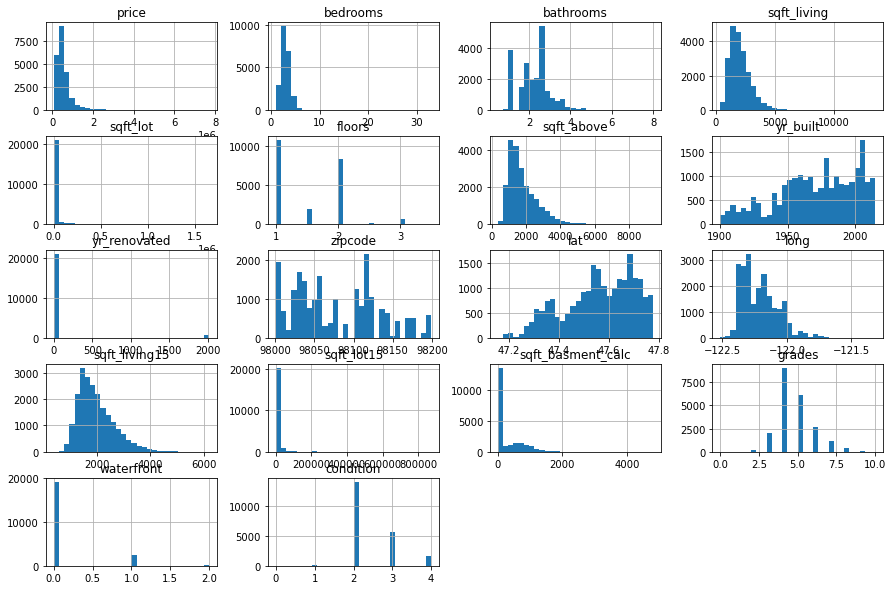

In [4]:
df.hist(bins=30, figsize=(15, 10))

In [5]:
y = df['price']

In [6]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.117864,-0.053402,0.306692,0.022036,0.585241,0.082845,0.323799,0.667951,0.114792,0.036056
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.017888,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.302808,0.356563,-0.004970,0.026496
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.047168,-0.204786,0.024280,0.224903,0.569884,0.088303,0.283440,0.665838,0.025747,-0.126479
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.051055,-0.199802,0.052155,0.241214,0.756402,0.184342,0.435130,0.762779,0.043306,-0.059445
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004970,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.015418,0.114731,0.011656,-0.008830
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003786,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.245715,0.458794,0.005347,-0.264075
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.020638,-0.261570,-0.001199,0.344842,0.731767,0.195077,-0.052156,0.756073,0.025175,-0.158904
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.202582,-0.347210,-0.148370,0.409993,0.326377,0.070777,-0.133064,0.447865,-0.014982,-0.361592
yr_renovated,0.117864,0.017888,0.047168,0.051055,0.004970,0.003786,0.020638,-0.202582,1.000000,0.062411,0.027985,-0.064557,0.000673,0.004277,0.067297,0.015617,0.042083,-0.055816
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.062411,1.000000,0.266742,-0.564259,-0.279299,-0.147294,0.074725,-0.185771,0.023850,0.002888


In [7]:
#created variable of interaction between grades & sqft_living because they are highly related
df['grade_sqft_product'] = df['grades'] * df['sqft_living']

In [8]:
relevant_columns = [
    'grade_sqft_product',  # Linear feet of street connected to property
    'condition',      # Lot size in square feet
    'waterfront',       # Type of road access to property
    'sqft_basment_calc',  # Rates the overall material and finish of the house
    'sqft_lot15',  # Rates the overall condition of the house
    'sqft_living15',    # Original construction date
    'long', # Remodel date (same as construction date if no remodeling or additions)
    'lat',    # Above grade (ground) living area square feet
    'yr_renovated',     # Full bathrooms above grade
    'yr_built', # Bedrooms above grade (does NOT include basement bedrooms)
    'floors', # Total rooms above grade (does not include bathrooms)
    'sqft_lot',   # Number of fireplaces
    'bathrooms',  # Fireplace quality
    'bedrooms',       # Month Sold (MM)       # Year Sold (YYYY)
]

In [9]:
regression_categories = df[relevant_columns]

In [10]:
#looked at r-squared of new variable compared to grade and sqft_living variables against price, saw that new variable has higher r-squared
y= df['price']
x= df['grade_sqft_product']
product_results = sm.OLS(y, sm.add_constant(x)).fit()
product_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                 3.070e+04
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        06:23:19   Log-Likelihood:            -2.9784e+05
No. Observations:               21597   AIC:                         5.957e+05
Df Residuals:                   21595   BIC:                         5.957e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.489e+05   2751.291     54.127      0.000    1.44e+05    1.54e+05
grade_sqft_product    37.2330      0.212    175.220      0.000      36.817      37.650
==============================================================================
Omnibus:                    12478.788   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           323781.362
Skew:                           2.291   Prob(JB):                         0.00
Kurtosis:                      21.407   Cond. No.                     2.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
y= df['price']
x= df.loc[:, ['grades', 'sqft_living']]
product_results = sm.OLS(y, sm.add_constant(x)).fit()
product_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        06:23:19   Log-Likelihood:            -2.9913e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21594   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.05e+05   7265.784    -41.983      0.000   -3.19e+05   -2.91e+05
grades       9.925e+04   2247.784     44.155      0.000    9.48e+04    1.04e+05
sqft_living   184.1215      2.872     64.102      0.000     178.491     189.751
==============================================================================
Omnibus:                    16960.955   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005795.090
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.773   Cond. No.                     1.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#our regression model of all regression categories 
y= df['price']
x= regression_categories
product_results = sm.OLS(y, sm.add_constant(x)).fit()
product_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     3640.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        06:23:19   Log-Likelihood:            -2.9430e+05
No. Observations:               21597   AIC:                         5.886e+05
Df Residuals:                   21582   BIC:                         5.887e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.343e+07   1.54e+06    -28.234      0.000   -4.64e+07   -4.04e+07
grade_sqft_product    36.5394      0.352    103.878      0.000      35.850      37.229
condition           4.013e+04   2321.882     17.282      0.000    3.56e+04    4.47e+04
waterfront          7.344e+04   3921.292     18.729      0.000    6.58e+04    8.11e+04
sqft_basment_calc     -8.7888      3.999     -2.198      0.028     -16.628      -0.950
sqft_lot15            -0.3896      0.073     -5.340      0.000      -0.533      -0.247
sqft_living15         36.6366      3.223     11.368      0.000      30.320      42.953
long               -1.743e+05   1.16e+04    -14.968      0.000   -1.97e+05   -1.51e+05
lat                 5.521e+05   1.03e+04     53.734      0.000    5.32e+05    5.72e+05
yr_renovated          45.3916      3.952     11.485      0.000      37.645      53.139
yr_built           -2104.5738     68.743    -30.615      0.000   -2239.315   -1969.832
floors              1.868e+04   3518.649      5.310      0.000    1.18e+04    2.56e+04
sqft_lot               0.0926      0.048      1.941      0.052      -0.001       0.186
bathrooms           3.603e+04   3188.477     11.301      0.000    2.98e+04    4.23e+04
bedrooms           -3.163e+04   1793.501    -17.635      0.000   -3.51e+04   -2.81e+04
==============================================================================
Omnibus:                    13864.220   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           576116.874
Skew:                           2.509   Prob(JB):                         0.00
Kurtosis:                      27.800   Cond. No.                     5.74e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#y= df['price']
#x= df['grade_sqft_product']
#product_results = sm.OLS(y, sm.add_constant(x)).fit()
#product_results.summary()